<a href="https://colab.research.google.com/github/LukegCashman/Cashman_ECGR3090/blob/main/LC_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SECTION 0: File set-up and confirmation
from copy import copy, deepcopy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Pull the csv file for Housing from github
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

# Read the data from Housing
df = pd.read_csv(url)

# Convert strings to numbers
df['mainroad'] = df['mainroad'].map({'yes':1 ,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1 ,'no':0})
df['basement'] = df['basement'].map({'yes':1 ,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 ,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1 ,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1 ,'no':0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':1 ,'semi-furnished':0.5,'unfurnished':0})

# Print Housing to confirm there are no issues
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [ ]:
# randomize the training and validation data split
np.random.seed(0)
df_train, df_validate = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
Y_train = df_train.values[:,0]
X_train = df_train.values[:,1:13]
Y_valid = df_validate.values[:,0]
X_valid = df_validate.values[:,1:13]
print(X_train[:1])

[[8.05e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 0.00e+00
  1.00e+00 1.00e+00 0.00e+00 1.00e+00]]


In [ ]:
# Count number of samples in each variable
Size = len(df)
TrainingSize = len(df_train)
ValidationSize = len(df_validate)
print(Size)
print(TrainingSize)
print(ValidationSize)

545
436
109


In [ ]:
# SECTION 1: Problem 1.a

# Initialize Theta, Alpha, and number of iterations
Theta1A = np.zeros(6)
Iterations = 2000
Alpha = 0.00000001

In [ ]:
# Initialize X variables
X0T = np.ones((TrainingSize, 1))
X0V = np.ones((ValidationSize, 1))
X_train1A = np.hstack((X0T, X_train[:,0:4], X_train[:,9:10]))
X_valid1A = np.hstack((X0V, X_valid[:,0:4], X_valid[:,9:10]))
print(X_train1A[:1])

[[1.00e+00 8.05e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00]]


In [ ]:
# Create function to compute error for training and validation sets
def comp_error(X, V, Yx, Yv, theta):
    predictionsT = X.dot(theta)
    predictionsV = V.dot(theta)
    errorsT = np.subtract(predictionsT, Yx)
    errorsV = np.subtract(predictionsV, Yv)
    sqrErrorsT = np.square(errorsT)
    sqrErrorsV = np.square(errorsV)
    J = 1 / (2 * TrainingSize) * np.sum(sqrErrorsT)
    K = 1 / (2 * ValidationSize) * np.sum(sqrErrorsV)
    return J, K

In [ ]:
# Create function to do gradient decent
def gradient_descent(X, V, Yx, Yv, theta, alpha, iterations):
    #Create array to store error for each iteration
    m = len(Yx)
    cost_historyT = np.zeros(iterations)
    cost_historyV = np.zeros(iterations)

    # repeat gradient decent 2000 times
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Yx)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_historyT[i], cost_historyV[i] = comp_error(X, V, Yx, Yv, theta)

    return theta, cost_historyT, cost_historyV

In [ ]:
# Find optimal Theta values for problem 1.a
Theta1A, cost_historyT1A, cost_historyV1A = gradient_descent(X_train1A, X_valid1A, Y_train, Y_valid, Theta1A, Alpha, Iterations)
print('Final value of theta =', Theta1A)
print('Final Training Cost =', cost_historyT1A[1999])
print(' Final Validation Cost =', cost_historyV1A[1999])

Final value of theta = [  7.36044218 861.88803695  27.67445268  16.10440651  24.73643613
   5.76207764]
Final Training Cost = 1690025216829.6504
 Final Validation Cost = 1609395169409.4768


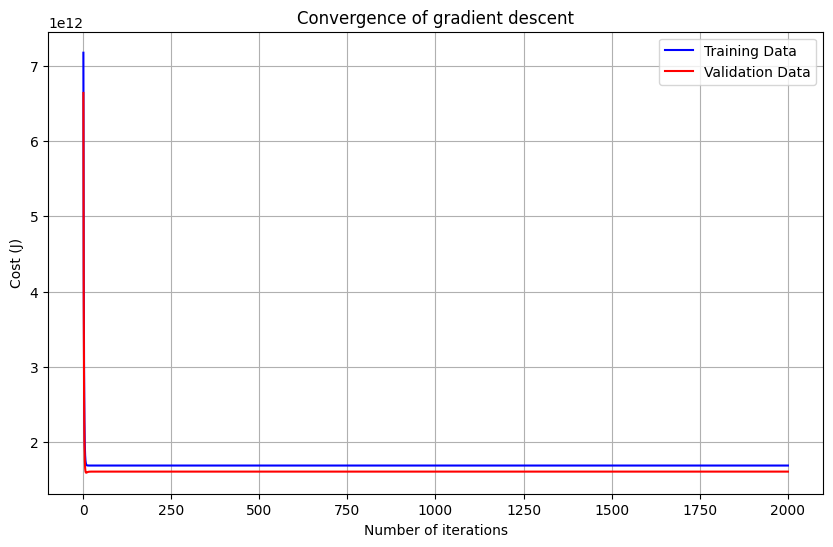

In [ ]:
# Plot cost at each iteration
plt.plot(range(1, Iterations + 1), cost_historyT1A, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyV1A, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# SECTION 2: Problem 1.b

# Initialize Theta, Alpha, and number of iterations
Theta1B = np.zeros(12)
Iterations = 2000
Alpha = 0.00000001

In [ ]:
# Initialize X variables
X_train1B = np.hstack((X0T, X_train[:,0:11]))
X_valid1B = np.hstack((X0V, X_valid[:,0:11]))
print(X_train1B[:1])

[[1.00e+00 8.05e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  0.00e+00 1.00e+00 1.00e+00 0.00e+00]]


In [ ]:
# Find optimal Theta values for problem 1.b
Theta1B, cost_historyT1B, cost_historyV1B = gradient_descent(X_train1B, X_valid1B, Y_train, Y_valid, Theta1B, Alpha, Iterations)
print('Final value of theta =', Theta1B)
print('Final Training Cost =', cost_historyT1B[1999])
print(' Final Validation Cost =', cost_historyV1B[1999])

Final value of theta = [  7.36043335 861.8862395   27.67442487  16.10439375  24.73641535
   6.3176613    2.82021371   4.36932651   1.3575804    6.19700809
   5.76207344   2.97557349]
Final Training Cost = 1690019491693.7764
 Final Validation Cost = 1609388031369.8103


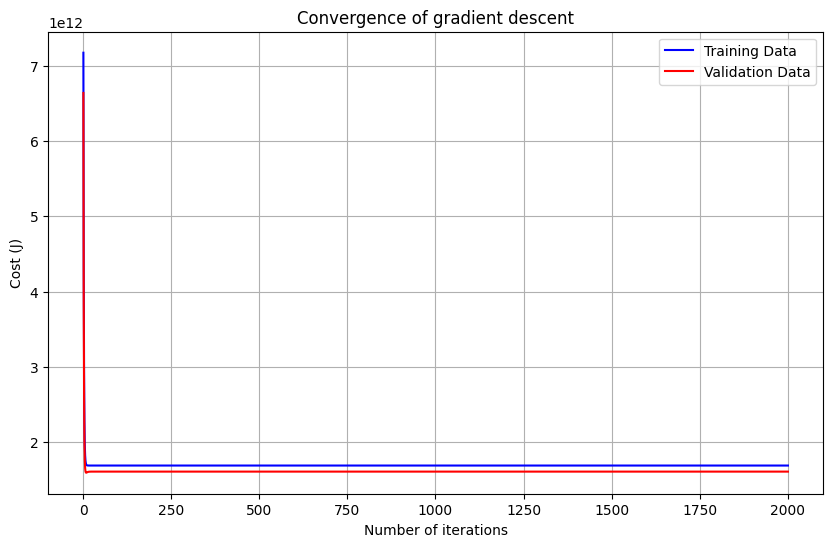

In [ ]:
# Plot cost at each iteration
plt.plot(range(1, Iterations + 1), cost_historyT1B, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyV1B, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# SECTION 3: Problem 2.a Normalized Data Set

# Create seperate data set to be normalized
dfN_train = deepcopy(df_train)
dfN_validate = deepcopy(df_validate)

In [ ]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

dfN_train[num_vars] = scaler.fit_transform(dfN_train[num_vars])
dfN_validate[num_vars] = scaler.fit_transform(dfN_validate[num_vars])
dfN_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1.0
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1.0
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1.0
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1.0
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0.5


In [ ]:
XN_train = dfN_train.values[:,1:13]
XN_valid = dfN_validate.values[:,1:13]
print(XN_train[:1])

[[0.4326093  0.4        0.         0.         1.         1.
  1.         0.         1.         0.33333333 0.         1.        ]]


In [ ]:
# Initialize Theta, Alpha, and number of iterations
ThetaN2A = np.zeros(6)
Iterations = 2000
Alpha = 0.01

In [ ]:
# Filter desired X variables out of data set
XN_train2A = np.hstack((X0T, XN_train[:,0:4], XN_train[:,9:10]))
XN_valid2A = np.hstack((X0V, XN_valid[:,0:4], XN_valid[:,9:10]))
print(XN_train2A[:1])

[[1.         0.4326093  0.4        0.         0.         0.33333333]]


In [ ]:
# Find optimal Theta values for normalized problem 2.a
ThetaN2A, cost_historyTN2A, cost_historyVN2A = gradient_descent(XN_train2A, XN_valid2A, Y_train, Y_valid, ThetaN2A, Alpha, Iterations)
print('Final value of theta =', ThetaN2A)
print('Final Training Cost =', cost_historyTN2A[1999])
print(' Final Validation Cost =', cost_historyVN2A[1999])

Final value of theta = [2748676.78099761 2241568.1821805  1403394.60828922 1890740.47239301
 1700157.82121759 1465097.76731294]
Final Training Cost = 886628494118.3252
 Final Validation Cost = 780225373692.5863


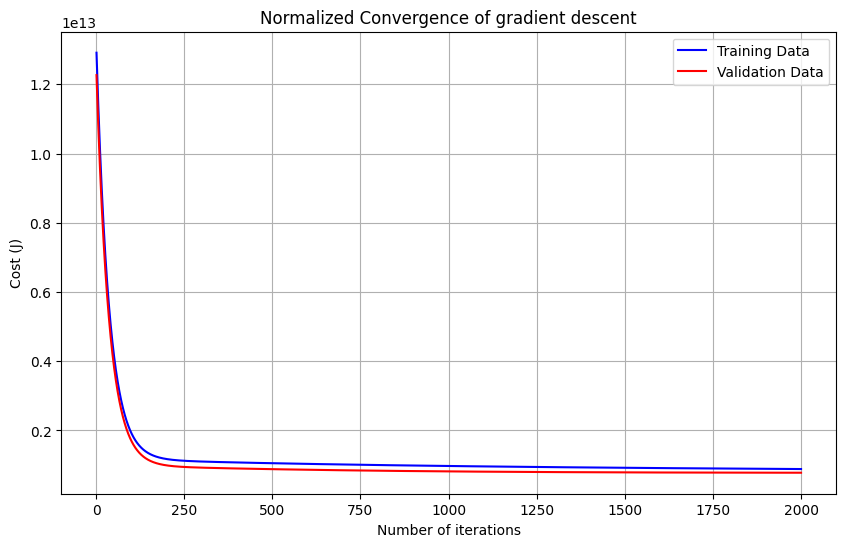

In [ ]:
# Plot cost at each iteration for normalized variables
plt.plot(range(1, Iterations + 1), cost_historyTN2A, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVN2A, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# SECTION 4: Problem 2.a Standardized Data Set

# Create a standardized data set
object = StandardScaler()
dfS_train = object.fit_transform(df_train)
dfS_validate = object.fit_transform(df_validate)
print(dfS_train[:1])

[[ 2.06384653  1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336
   1.40049229]]


In [ ]:
# Set X variables for standardization
XS_train = dfS_train[:,1:13]
XS_valid = dfS_validate[:,1:13]
print(XS_train[:1])

[[ 1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773  2.19393102
   1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336  1.40049229]]


In [ ]:
# Initialize Theta, Alpha, and number of iterations
ThetaS2A = np.zeros(6)
Iterations = 2000
Alpha = 0.01

In [ ]:
# Filter desired X variables out of data set
XS_train2A = np.hstack((X0T, XS_train[:,0:4], XS_train[:,9:10]))
XS_valid2A = np.hstack((X0V, XS_valid[:,0:4], XS_valid[:,9:10]))
print(XS_train2A[:1])

[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]]


In [ ]:
# Find optimal Theta values for standardize problem 2.a
ThetaS2A, cost_historyTS2A, cost_historyVS2A = gradient_descent(XS_train2A, XS_valid2A, Y_train, Y_valid, ThetaS2A, Alpha, Iterations)
print('Final value of theta =', ThetaS2A)
print('Final Training Cost =', cost_historyTS2A[1999])
print(' Final Validation Cost =', cost_historyVS2A[1999])

Final value of theta = [4795729.21124542  729932.49170619   79337.82792296  641263.73847772
  463853.70145071  287330.71226002]
Final Training Cost = 761034841417.8114
 Final Validation Cost = 804941789452.7744


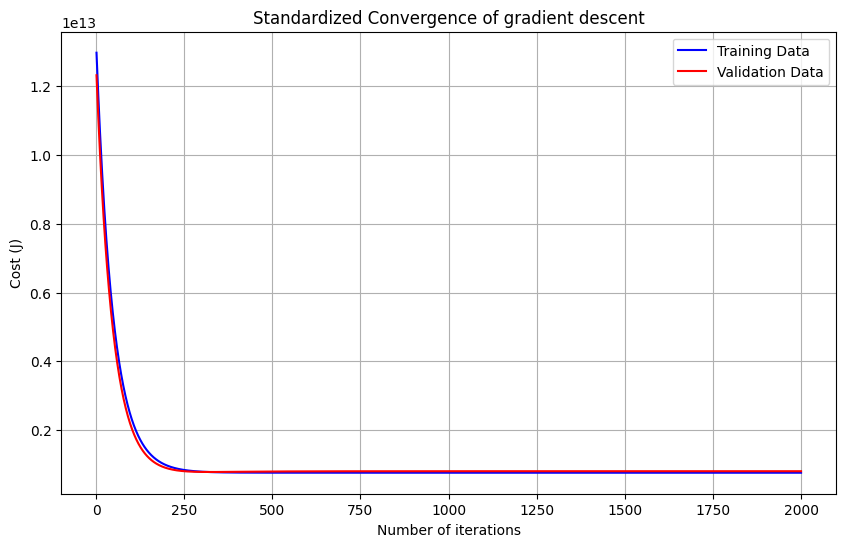

In [ ]:
# Plot cost at each iteration for standardized variables
plt.plot(range(1, Iterations + 1), cost_historyTS2A, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVS2A, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# Section 5: Problem 2.b

# Initialize Theta, Alpha, and number of iterations
ThetaN2B = np.zeros(12)
Iterations = 2000
Alpha = 0.01

In [ ]:
# Filter X variables out of data set
XN_train2B = np.hstack((X0T, XN_train[:,0:11]))
XN_valid2B = np.hstack((X0V, XN_valid[:,0:11]))
print(XN_train2B[:1])

[[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]]


In [ ]:
# Find optimal Theta values for normalized problem 2.b
ThetaN2B, cost_historyTN2B, cost_historyVN2B = gradient_descent(XN_train2B, XN_valid2B, Y_train, Y_valid, ThetaN2B, Alpha, Iterations)
print('Final value of theta =', ThetaN2B)
print('Final Training Cost =', cost_historyTN2B[1999])
print(' Final Validation Cost =', cost_historyVN2B[1999])

Final value of theta = [1753036.16289273 1477321.92566107 1092493.72872706 1659508.91912708
 1326630.18494303  910408.16085025  541587.6652616   316357.60724444
  714508.69204829 1055414.6600494  1054764.88618164  664130.17448554]
Final Training Cost = 659181328450.1642
 Final Validation Cost = 594021865752.601


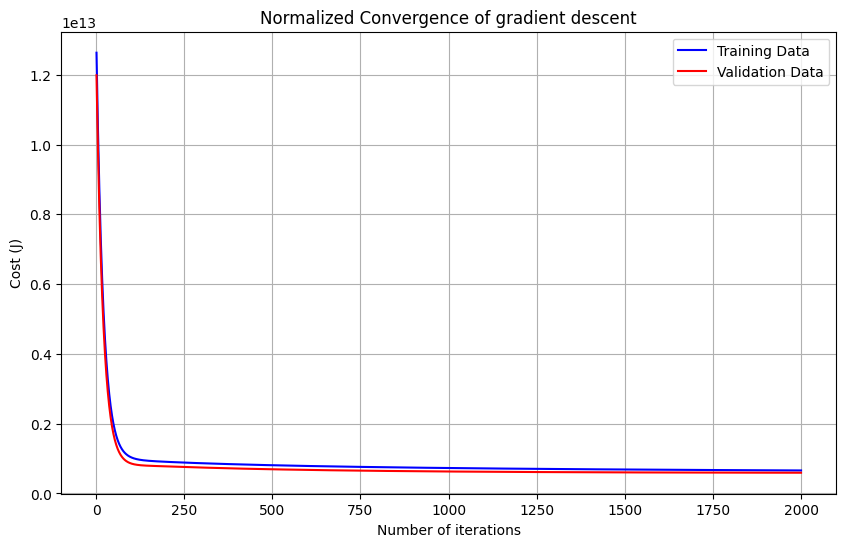

In [ ]:
# Plot cost at each iteration for normalized variables
plt.plot(range(1, Iterations + 1), cost_historyTN2B, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVN2B, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# Initialize Theta, Alpha, and number of iterations
ThetaS2B = np.zeros(12)
Iterations = 2000
Alpha = 0.01

In [ ]:
# Filter desired X variables out of data set
XS_train2B = np.hstack((X0T, XS_train[:,0:11]))
XS_valid2B = np.hstack((X0V, XS_valid[:,0:11]))
print(XS_train2B[:1])

[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336]]


In [ ]:
# Find optimal Theta values for standardize problem 2.b
ThetaS2B, cost_historyTS2B, cost_historyVS2B = gradient_descent(XS_train2B, XS_valid2B, Y_train, Y_valid, ThetaS2B, Alpha, Iterations)
print('Final value of theta =', ThetaS2B)
print('Final Training Cost =', cost_historyTS2B[1999])
print(' Final Validation Cost =', cost_historyVS2B[1999])

Final value of theta = [4795729.21124542  532825.70926041   72742.14578711  578494.12356263
  367584.59145058  210305.74767438  146059.3340565   145395.07151451
  204961.49352465  399917.8005776   222492.97376886  255730.43375461]
Final Training Cost = 574234324820.575
 Final Validation Cost = 596454824057.0768


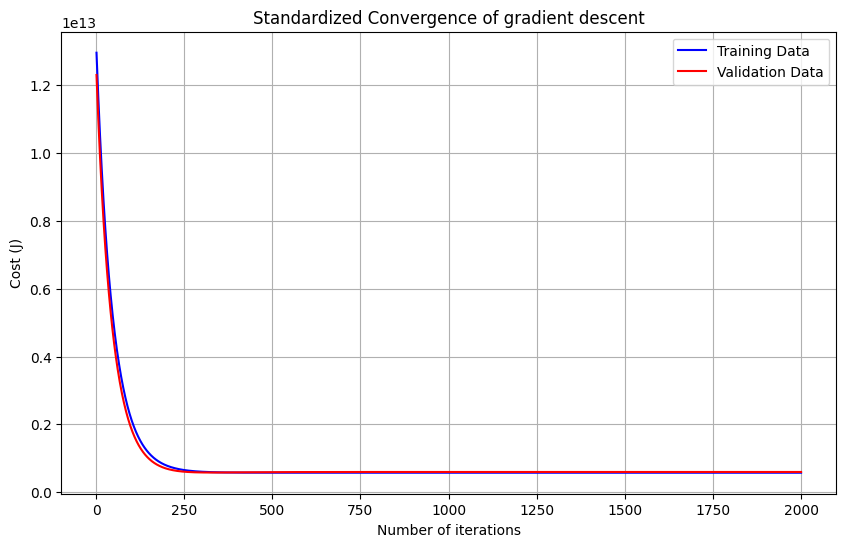

In [ ]:
# Plot cost at each iteration for standardized variables
plt.plot(range(1, Iterations + 1), cost_historyTS2B, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVS2B, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# SECTION 6: Problem 3.a

# Create function to do gradient decent
def reg_grad_decent(X, V, Yx, Yv, theta, alpha, lamda, iterations):
    #Create array to store error for each iteration
    m = len(Yx)
    cost_historyT = np.zeros(iterations)
    cost_historyV = np.zeros(iterations)

    # repeat gradient decent 2000 times
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Yx)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta*(1-alpha*lamda/m) - sum_delta
        cost_historyT[i], cost_historyV[i] = comp_error(X, V, Yx, Yv, theta)

    return theta, cost_historyT, cost_historyV

In [ ]:
# Initialize Theta, Alpha, Lamda, and number of iterations
ThetaS3A = np.zeros(6)
Iterations = 2000
Alpha = 0.01
Lamda = 20

In [ ]:
# Filter desired X variables out of data set
XS_train3A = np.hstack((X0T, XS_train[:,0:4], XS_train[:,9:10]))
XS_valid3A = np.hstack((X0V, XS_valid[:,0:4], XS_valid[:,9:10]))
print(XS_train3A[:1])

[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]]


In [ ]:
# Find optimal Theta values for standardize problem 3.a
ThetaS3A, cost_historyTS3A, cost_historyVS3A = reg_grad_decent(XS_train3A, XS_valid3A, Y_train, Y_valid, ThetaS3A, Alpha, Lamda, Iterations)
print('Final value of theta =', ThetaS3A)
print('Final Training Cost =', cost_historyTS3A[1999])
print(' Final Validation Cost =', cost_historyVS3A[1999])

Final value of theta = [4585390.21591595  701830.69331307   94953.37992842  618248.98531688
  446380.42892109  285400.4131059 ]
Final Training Cost = 784092358324.5691
 Final Validation Cost = 789995069179.5002


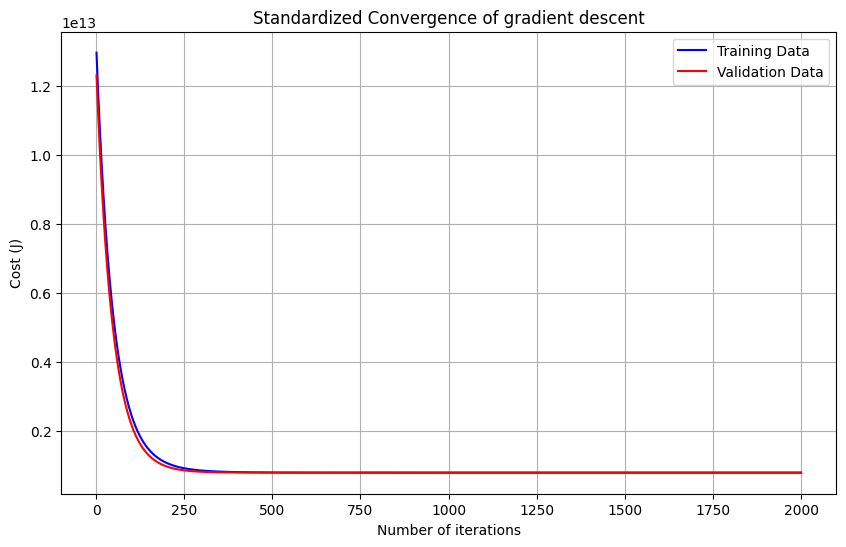

In [ ]:
# Plot cost at each iteration for standardized variables
plt.plot(range(1, Iterations + 1), cost_historyTS3A, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVS3A, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Convergence of gradient descent')
plt.legend()

plt.show()

In [ ]:
# SECTION 7: Problem 3.b

# Initialize Theta, Alpha, and number of iterations
ThetaS3B = np.zeros(12)
Iterations = 2000
Alpha = 0.01
Lamda = 10

In [ ]:
# Filter desired X variables out of data set
XS_train3B = np.hstack((X0T, XS_train[:,0:11]))
XS_valid3B = np.hstack((X0V, XS_valid[:,0:11]))
print(XS_train3B[:1])

[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336]]


In [ ]:
# Find optimal Theta values for standardize problem 2.b
ThetaS3B, cost_historyTS3B, cost_historyVS3B = reg_grad_decent(XS_train3B, XS_valid3B, Y_train, Y_valid, ThetaS3B, Alpha, Lamda, Iterations)
print('Final value of theta =', ThetaS3B)
print('Final Training Cost =', cost_historyTS3B[1999])
print(' Final Validation Cost =', cost_historyVS3B[1999])

Final value of theta = [4688201.65369562  523969.93585264   79894.27533706  567932.64490452
  361389.04415383  209942.5533531   147377.82625927  142377.21439136
  200227.5487988   395217.15859847  222539.75330478  253054.43701832]
Final Training Cost = 580200055825.7565
 Final Validation Cost = 584177137889.1534


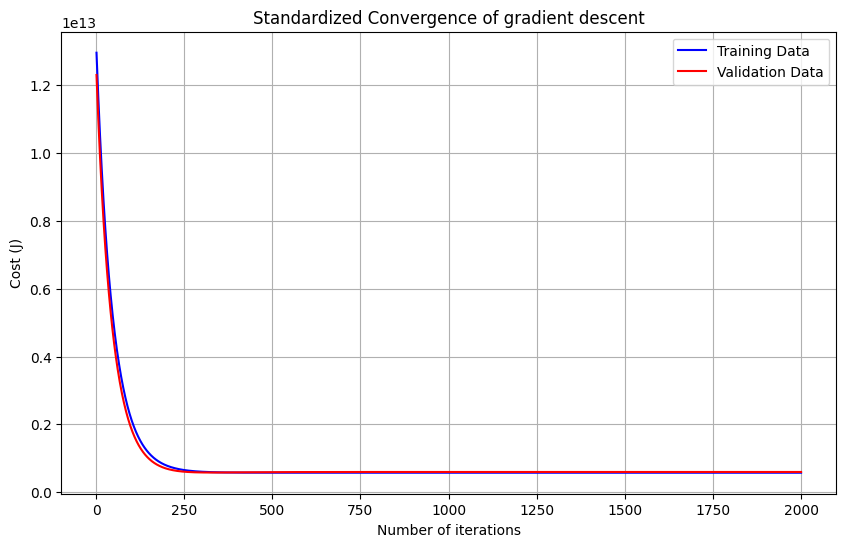

In [ ]:
# Plot cost at each iteration for standardized variables
plt.plot(range(1, Iterations + 1), cost_historyTS2B, color='blue', label='Training Data')
plt.plot(range(1, Iterations + 1), cost_historyVS2B, color='red', label='Validation Data')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized Convergence of gradient descent')
plt.legend()

plt.show()